In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AVNW.csv" , encoding = "ISO-8859-1")
df.shape

(755, 7)

In [3]:
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,8.980000,9.005000,8.770000,8.875000,8.875000,61200
2018-09-11,8.775000,8.780000,8.750000,8.750000,8.750000,22800
2018-09-12,8.725000,8.810000,8.700000,8.700000,8.700000,46000
2018-09-13,8.705000,8.705000,8.500000,8.530000,8.530000,30600
2018-09-14,8.515000,8.715000,8.430000,8.500000,8.500000,52200
...,...,...,...,...,...,...
2021-09-01,35.220001,36.930000,34.900002,35.970001,35.970001,130300
2021-09-02,36.139999,36.849998,35.639999,36.400002,36.400002,129400
2021-09-03,36.299999,36.320000,35.419998,36.189999,36.189999,90200


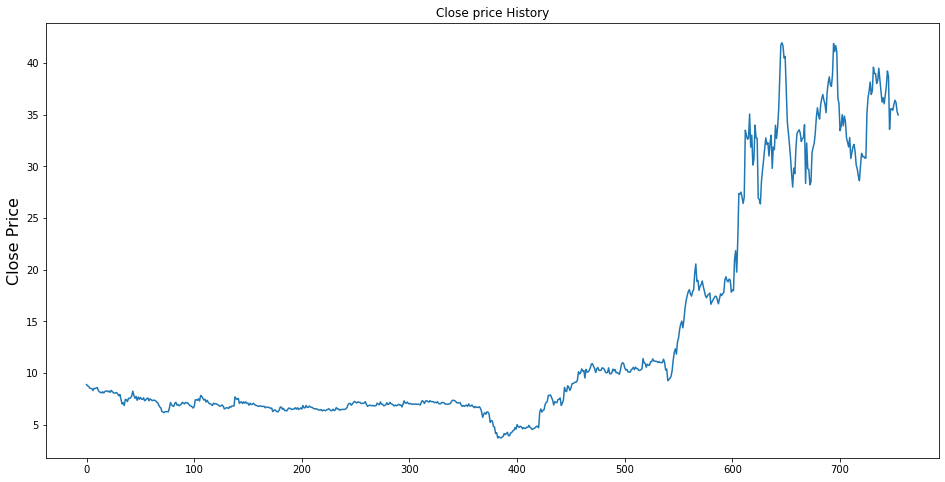

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [5]:
df1 = df.dropna(how="any")

In [6]:
data1 = df1.filter(['Close'])
data1

,Close
0,8.875000
1,8.750000
2,8.700000
3,8.530000
4,8.500000
...,...
750,35.970001
751,36.400002
752,36.189999
753,35.310001


In [7]:
data = data1.values
data

array([[ 8.875   ],
       [ 8.75    ],
       [ 8.7     ],
       [ 8.53    ],
       [ 8.5     ],
       [ 8.485   ],
       [ 8.3     ],
       [ 8.515   ],
       [ 8.49    ],
       [ 8.535   ],
       [ 8.59    ],
       [ 8.29    ],
       [ 8.165   ],
       [ 8.125   ],
       [ 8.075   ],
       [ 8.175   ],
       [ 8.06    ],
       [ 8.19    ],
       [ 8.265   ],
       [ 8.255   ],
       [ 8.175   ],
       [ 8.25    ],
       [ 8.125   ],
       [ 8.315   ],
       [ 8.19    ],
       [ 8.075   ],
       [ 8.045   ],
       [ 8.075   ],
       [ 8.1     ],
       [ 7.94    ],
       [ 7.795   ],
       [ 7.92    ],
       [ 7.44    ],
       [ 7.      ],
       [ 7.12    ],
       [ 6.85    ],
       [ 7.44    ],
       [ 7.405   ],
       [ 7.23    ],
       [ 7.55    ],
       [ 7.53    ],
       [ 7.595   ],
       [ 7.785   ],
       [ 8.24    ],
       [ 7.81    ],
       [ 7.55    ],
       [ 7.72    ],
       [ 7.355   ],
       [ 7.665   ],
       [ 7.46    ],


In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[1.35205755e-01],
       [1.31939915e-01],
       [1.30633580e-01],
       [1.26192038e-01],
       [1.25408236e-01],
       [1.25016336e-01],
       [1.20182893e-01],
       [1.25800137e-01],
       [1.25146969e-01],
       [1.26322672e-01],
       [1.27759641e-01],
       [1.19921626e-01],
       [1.16655787e-01],
       [1.15610718e-01],
       [1.14304382e-01],
       [1.16917054e-01],
       [1.13912481e-01],
       [1.17308955e-01],
       [1.19268458e-01],
       [1.19007191e-01],
       [1.16917054e-01],
       [1.18876557e-01],
       [1.15610718e-01],
       [1.20574794e-01],
       [1.17308955e-01],
       [1.14304382e-01],
       [1.13520581e-01],
       [1.14304382e-01],
       [1.14957550e-01],
       [1.10777276e-01],
       [1.06988902e-01],
       [1.10254741e-01],
       [9.77139176e-02],
       [8.62181626e-02],
       [8.93533685e-02],
       [8.22991552e-02],
       [9.77139176e-02],
       [9.67994825e-02],
       [9.22273072e-02],
       [1.00587856e-01],


In [9]:
train_data_len = math.ceil(len(data) * 0.80)
train_data = scaled_data[0:train_data_len, :]

In [10]:
p=110
x_train = []
y_train = []
for i in range(p, len(train_data)):
    x_train.append(train_data[i-p:i, 0])
    y_train.append(train_data[i, 0])
    if i<=p+1:
        print(x_train)
        print(y_train)

[array([0.13520575, 0.13193992, 0.13063358, 0.12619204, 0.12540824,
       0.12501634, 0.12018289, 0.12580014, 0.12514697, 0.12632267,
       0.12775964, 0.11992163, 0.11665579, 0.11561072, 0.11430438,
       0.11691705, 0.11391248, 0.11730895, 0.11926846, 0.11900719,
       0.11691705, 0.11887656, 0.11561072, 0.12057479, 0.11730895,
       0.11430438, 0.11352058, 0.11430438, 0.11495755, 0.11077728,
       0.1069889 , 0.11025474, 0.09771392, 0.08621816, 0.08935337,
       0.08229916, 0.09771392, 0.09679948, 0.09222731, 0.10058786,
       0.10006532, 0.10176356, 0.10672763, 0.11861529, 0.1073808 ,
       0.10058786, 0.1050294 , 0.09549315, 0.10359243, 0.09823645,
       0.10267799, 0.09862835, 0.09758328, 0.10176356, 0.09431744,
       0.09627695, 0.09980405, 0.10124102, 0.09418681, 0.09915089,
       0.09706075, 0.09457871, 0.09562378, 0.09562378, 0.09470935,
       0.09144351, 0.08935337, 0.08386676, 0.07877205, 0.07642064,
       0.06727629, 0.06583932, 0.06427172, 0.06662313, 0.0668

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(494, 110, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
124/124 [==============================] - 11s 52ms/step - loss: 0.0017
Epoch 2/10
124/124 [==============================] - 6s 45ms/step - loss: 6.2552e-04
Epoch 3/10
124/124 [==============================] - 5s 43ms/step - loss: 4.2565e-04
Epoch 4/10
124/124 [==============================] - 5s 43ms/step - loss: 3.1070e-04
Epoch 5/10
124/124 [==============================] - 5s 42ms/step - loss: 3.3200e-04
Epoch 6/10
124/124 [==============================] - 5s 42ms/step - loss: 3.1488e-04
Epoch 7/10
124/124 [==============================] - 5s 42ms/step - loss: 2.8693e-04
Epoch 8/10
124/124 [==============================] - 5s 41ms/step - loss: 2.0766e-04
Epoch 9/10
124/124 [==============================] - 5s 42ms/step - loss: 2.6385e-04
Epoch 10/10
124/124 [==============================] - 5s 40ms/step - loss: 2.4157e-04


In [14]:
test_data = scaled_data[train_data_len - p: , :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(p, len(test_data)):
    x_test.append(test_data[i-p:i, 0])

In [15]:
x_test = np.array(x_test)
x_test.shape

(151, 110)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [17]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
predict

array([[18.73262 ],
       [19.179764],
       [20.006449],
       [21.747116],
       [23.73415 ],
       [25.583866],
       [26.92301 ],
       [27.581474],
       [27.796501],
       [28.936134],
       [30.234158],
       [31.296997],
       [32.01073 ],
       [32.820477],
       [32.797104],
       [32.517105],
       [31.46312 ],
       [30.242308],
       [29.758615],
       [29.486921],
       [29.410942],
       [28.321362],
       [26.893948],
       [25.440222],
       [24.67449 ],
       [24.670952],
       [25.397415],
       [26.704483],
       [28.366938],
       [29.877865],
       [31.108633],
       [31.70877 ],
       [32.098484],
       [32.400764],
       [31.91389 ],
       [31.470964],
       [31.013939],
       [31.084003],
       [31.150248],
       [31.43405 ],
       [32.1273  ],
       [33.548286],
       [35.79297 ],
       [38.152317],
       [40.09159 ],
       [41.147434],
       [41.482994],
       [40.58192 ],
       [38.42265 ],
       [35.652386],


In [18]:
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

1.7482620817054595

C:\Users\rudra\AppData\Local\Temp/ipykernel_12192/1781683567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predict


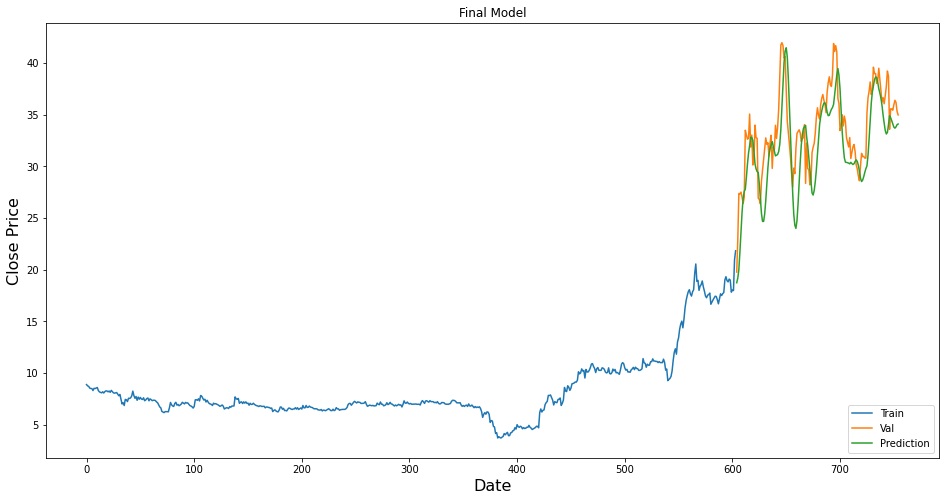

In [19]:
train = data1[:train_data_len]
valid = data1[train_data_len:]
valid['Prediction'] = predict
plt.figure(figsize=(16,8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [20]:
df2 = pd.read_csv("AVNW.csv" , encoding = "ISO-8859-1")
new_df = df2.filter(['Close'])
new_df1 = new_df.dropna(how="any")
new_df2 = new_df1.values
data2_len = 342
data2 = new_df2[0:data2_len, :]
data2.shape

(342, 1)

In [21]:
last_days = data2[-p:]
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[7.196548]]


In [22]:
new_df[342:]

,Close
342,7.320000
343,7.240000
344,7.105000
345,7.110000
346,7.100000
...,...
750,35.970001
751,36.400002
752,36.189999
753,35.310001


In [23]:
len(test_data)

261

In [38]:
x_input = test_data[151:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = p
i=0
num = int(input())
while(i<num):
    
    if(len(temp_input)>p):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7922433018684387], [0.783389687538147], [0.770656943321228], [0.7553429007530212], [0.7382771372795105], [0.7200198769569397], [0.7009899616241455], [0.6815337538719177], [0.6619606018066406], [0.642556369304657], [0.6235859990119934], [0.6052895188331604], [0.587877094745636], [0.5715245604515076], [0.5563690066337585], [0.5425071716308594], [0.5299959182739258], [0.5188528895378113], [0.5090605616569519], [0.5005689859390259]]


In [39]:
output = scaler.inverse_transform(lst_output)
output

array([[34.02311079],
       [33.68423872],
       [33.19689296],
       [32.61074802],
       [31.95755595],
       [31.25875935],
       [30.53038938],
       [29.78570307],
       [29.03654071],
       [28.29384375],
       [27.56775287],
       [26.86745512],
       [26.20099463],
       [25.57510141],
       [24.99502262],
       [24.46446091],
       [23.98559271],
       [23.55909331],
       [23.18429198],
       [22.85927694]])

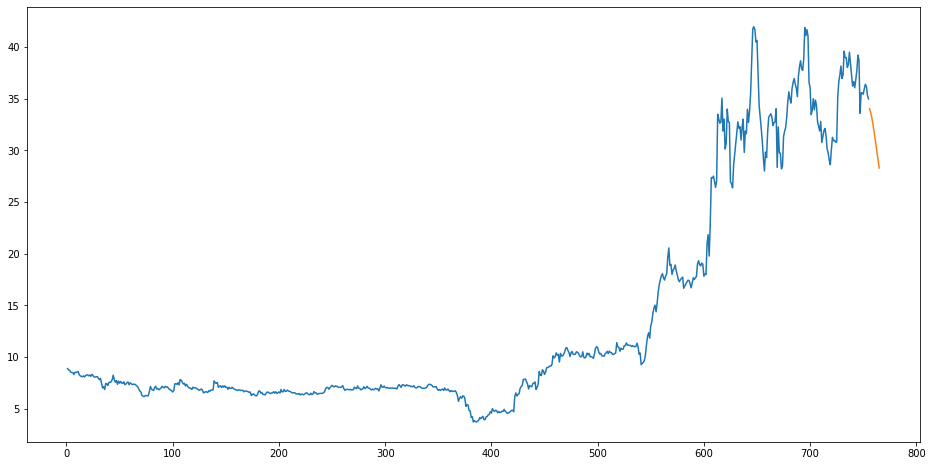

In [26]:
day_new = np.arange(1,756)
day_pred = np.arange(756,756+num)
plt.figure(figsize=(16,8))
plt.plot(day_new,data1[['Close']])
plt.plot(day_pred,output)
plt.show()

In [27]:
y = test_data[151:].reshape(1,-1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j=0
num = 10
while(j<num):
    
    if(len(temp1)>p):
        y=np.array(temp1[1:])
        y=y.reshape(1,-1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1=temp1[1:]
        lst1.extend(yhat1.tolist())
        j=j+1
    else:
        y = y.reshape((1, n1,1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        lst1.extend(yhat1.tolist())
        j=j+1
    

print(lst1)

111
[[0.7922433018684387], [0.783389687538147], [0.770656943321228], [0.7553429007530212], [0.7382771372795105], [0.7200198769569397], [0.7009899616241455], [0.6815337538719177], [0.6619606018066406], [0.642556369304657]]


In [28]:
out = scaler.inverse_transform(lst1)
out

array([[34.02311079],
       [33.68423872],
       [33.19689296],
       [32.61074802],
       [31.95755595],
       [31.25875935],
       [30.53038938],
       [29.78570307],
       [29.03654071],
       [28.29384375]])

In [29]:
lst2 = out.tolist()
lst2

[[34.02311079452789],
 [33.6842387237432],
 [33.196892964306116],
 [32.610748015636084],
 [31.95755595281899],
 [31.258759350487114],
 [30.530389379184246],
 [29.785703066380144],
 [29.036540710227968],
 [28.293843750023008]]

In [30]:
from itertools import chain

In [31]:
lst3 = list(chain.from_iterable(lst2))
lst3

[34.02311079452789,
 33.6842387237432,
 33.196892964306116,
 32.610748015636084,
 31.95755595281899,
 31.258759350487114,
 30.530389379184246,
 29.785703066380144,
 29.036540710227968,
 28.293843750023008]

In [32]:
def findmin(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==0 and arr[i]<arr[i+1]:
                ans.append((arr[i],i))
            if i==len(arr)-1 and arr[i-1]> arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] >arr[i] and arr[i]< arr[i+1]:
                ans.append((arr[i],i))
    return ans

mn = findmin(lst3)
print(mn)

[(28.293843750023008, 9)]


In [33]:
def findmax(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==len(arr)-1 and arr[i-1]<arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] <arr[i] and arr[i]> arr[i+1]:
                ans.append((arr[i],i))
    return ans

mx = findmax(lst3)
print(mx)

[]


In [34]:
def maxprofit(mn,mx):
    profit =[]
    for x,i in mn:
        for y,j in mx:
            if y-x>0 and j>i:
                profit.append((i,j,y-x))
    return profit

profit = maxprofit(mn,mx)
print(profit)

[]


In [35]:
def finalProfit(profit):
    mx = -1
    px,py,pro = 0,0,0
    for x,y,p in profit:
        if p>=mx:
            px,py,pro =x,y,p
            mx =p 
    return (px,py,pro)
    
print(finalProfit(profit))

(0, 0, 0)


In [36]:
import tensorflow as tf
filename = 'avnw.pkl'
tf.keras.models.save_model(model, filename)


INFO:tensorflow:Assets written to: avnw.pkl\assets


INFO:tensorflow:Assets written to: avnw.pkl\assets


In [37]:
loaded_model = tf.keras.models.load_model('avnw.pkl')

In [ ]:
y = test_data[151:].reshape(1, -1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j = 0
num = 10
while(j < num):

    if(len(temp1) > p):
        y = np.array(temp1[1:])
        y = y.reshape(1, -1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1 = temp1[1:]
        lst1.extend(yhat1.tolist())
        j = j+1
    else:
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        print(len(temp1))
        lst1.extend(yhat1.tolist())
        j = j+1


print(lst1)
